In [4]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('/content/Dataset.csv')

In [7]:
df.head()

Patient ID   TypicalAnginal_ChestPainType  AtypicalAnginal_ChestPainType  \
0            1                             0                              1   
1            2                             0                              0   
2            3                             0                              1   
3            4                             0                              0   
4            5                             0                              0   

   NonAnginal_ChestPainType  Asymptomatic_ChestPainType  RestingBP  \
0                         0                           0        140   
1                         1                           0        160   
2                         0                           0        130   
3                         0                           1        138   
4                         1                           0        150   

   Cholesterol  FastingBS  Normal_RestingECG  ST_RestingECG  ...  \
0          289          0                  1              0  ...   
1          180          0                  1              0  ...   
2          283          0                  0              1  ...   
3          214          0                  1              0  ...   
4          195          0                  1              0  ...   

   creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  \
0                       582         0                 20                    1   
1                      7861         0                 38                    0   
2                       146         0                 20                    0   
3                       111         0                 20                    0   
4                       160         1                 20                    0   

   platelets  serum_creatinine  serum_sodium  smoking  time  DEATH_EVENT  
0  265000.00               1.9           130        0     4            1  
1  263358.03               1.1           136        0     6            1  
2  162000.00               1.3           129        1     7            1  
3  210000.00               1.9           137        0     7            1  
4  327000.00               2.7           116        0     8            1  

[5 rows x 31 columns]

In [8]:
df.shape

(299, 31)

In [9]:
df.describe()

Patient ID   TypicalAnginal_ChestPainType  \
count   299.000000                    299.000000   
mean    150.000000                      0.040134   
std      86.458082                      0.196602   
min       1.000000                      0.000000   
25%      75.500000                      0.000000   
50%     150.000000                      0.000000   
75%     224.500000                      0.000000   
max     299.000000                      1.000000   

       AtypicalAnginal_ChestPainType  NonAnginal_ChestPainType  \
count                     299.000000                299.000000   
mean                        0.351171                  0.180602   
std                         0.478136                  0.385333   
min                         0.000000                  0.000000   
25%                         0.000000                  0.000000   
50%                         0.000000                  0.000000   
75%                         1.000000                  0.000000   
max                         1.000000                  1.000000   

       Asymptomatic_ChestPainType   RestingBP  Cholesterol   FastingBS  \
count                  299.000000  299.000000   299.000000  299.000000   
mean                     0.428094  132.274247   242.207358    0.090301   
std                      0.495632   17.745546    75.102908    0.287093   
min                      0.000000   92.000000     0.000000    0.000000   
25%                      0.000000  120.000000   201.000000    0.000000   
50%                      0.000000  130.000000   237.000000    0.000000   
75%                      1.000000  140.000000   277.000000    0.000000   
max                      1.000000  200.000000   603.000000    1.000000   

       Normal_RestingECG  ST_RestingECG  ...  creatinine_phosphokinase  \
count         299.000000     299.000000  ...                299.000000   
mean            0.802676       0.177258  ...                581.839465   
std             0.398646       0.382527  ...                970.287881   
min             0.000000       0.000000  ...                 23.000000   
25%             1.000000       0.000000  ...                116.500000   
50%             1.000000       0.000000  ...                250.000000   
75%             1.000000       0.000000  ...                582.000000   
max             1.000000       1.000000  ...               7861.000000   

         diabetes  ejection_fraction  high_blood_pressure      platelets  \
count  299.000000         299.000000           299.000000     299.000000   
mean     0.418060          38.083612             0.351171  263358.029264   
std      0.494067          11.834841             0.478136   97804.236869   
min      0.000000          14.000000             0.000000   25100.000000   
25%      0.000000          30.000000             0.000000  212500.000000   
50%      0.000000          38.000000             0.000000  262000.000000   
75%      1.000000          45.000000             1.000000  303500.000000   
max      1.000000          80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium    smoking        time  DEATH_EVENT  
count         299.00000    299.000000  299.00000  299.000000    299.00000  
mean            1.39388    136.625418    0.32107  130.260870      0.32107  
std             1.03451      4.412477    0.46767   77.614208      0.46767  
min             0.50000    113.000000    0.00000    4.000000      0.00000  
25%             0.90000    134.000000    0.00000   73.000000      0.00000  
50%             1.10000    137.000000    0.00000  115.000000      0.00000  
75%             1.40000    140.000000    1.00000  203.000000      1.00000  
max             9.40000    148.000000    1.00000  285.000000      1.00000  

[8 rows x 31 columns]

In [10]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(16)

Total records =  299


Total Missing  In Percent
Patient ID                            0         0.0
Down_STSlope                          0         0.0
time                                  0         0.0
smoking                               0         0.0
serum_sodium                          0         0.0
serum_creatinine                      0         0.0
platelets                             0         0.0
high_blood_pressure                   0         0.0
ejection_fraction                     0         0.0
diabetes                              0         0.0
creatinine_phosphokinase              0         0.0
anaemia                               0         0.0
Sex                                   0         0.0
Age                                   0         0.0
HeartDisease                          0         0.0
Flat_STSlope                          0         0.0

In [11]:
features=df.copy()

In [12]:
X = features.drop('DEATH_EVENT', axis=1)
Y = features['DEATH_EVENT']

In [13]:
Y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
from sklearn import tree

In [16]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [17]:
clf.score(X_test,Y_test)

0.7166666666666667

In [23]:
from sklearn.tree import DecisionTreeClassifier

max_depth = [2, 3, 4, 5, 6]      #maximum depth of decision tree
min_samples_split = [2, 3, 4, 5] #
min_samples_leaf = [1, 2, 3]
max_features = [None, 'sqrt', 'log2']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

results = []
dtc_accuracy=0

for depth in max_depth:
    for split in min_samples_split:
        for leaf in min_samples_leaf:
            for feat in max_features:
                for crit in criterion:
                    for spl in splitter:
                        
                        dtc = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, 
                                                     min_samples_leaf=leaf, max_features=feat,
                                                     criterion=crit, splitter=spl)
                       
                        dtc.fit(X_train, Y_train)
                        accuracy = dtc.score(X_test, Y_test)
                        
                        results.append({'max_depth': depth, 'min_samples_split': split, 
                                        'min_samples_leaf': leaf, 'max_features': feat,
                                        'criterion': crit, 'splitter': spl, 'accuracy': accuracy})
                        dtc_accuracy=max(accuracy,dtc_accuracy)


results_sorted = sorted(results, key=lambda x: x['accuracy'], reverse=True)[:10]
for i, result in enumerate(results_sorted):
    print(f"Rank {i+1}: {result}")

print("dtc_accuracy is ", dtc_accuracy*100, "%")

Rank 1: {'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'criterion': 'entropy', 'splitter': 'best', 'accuracy': 0.9166666666666666}
Rank 2: {'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'criterion': 'entropy', 'splitter': 'best', 'accuracy': 0.9166666666666666}
Rank 3: {'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'criterion': 'entropy', 'splitter': 'random', 'accuracy': 0.9166666666666666}
Rank 4: {'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'criterion': 'entropy', 'splitter': 'best', 'accuracy': 0.9166666666666666}
Rank 5: {'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'criterion': 'entropy', 'splitter': 'random', 'accuracy': 0.9166666666666666}
Rank 6: {'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'criterion': 'gini', 'splitter': 'best', '

In [19]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [21]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


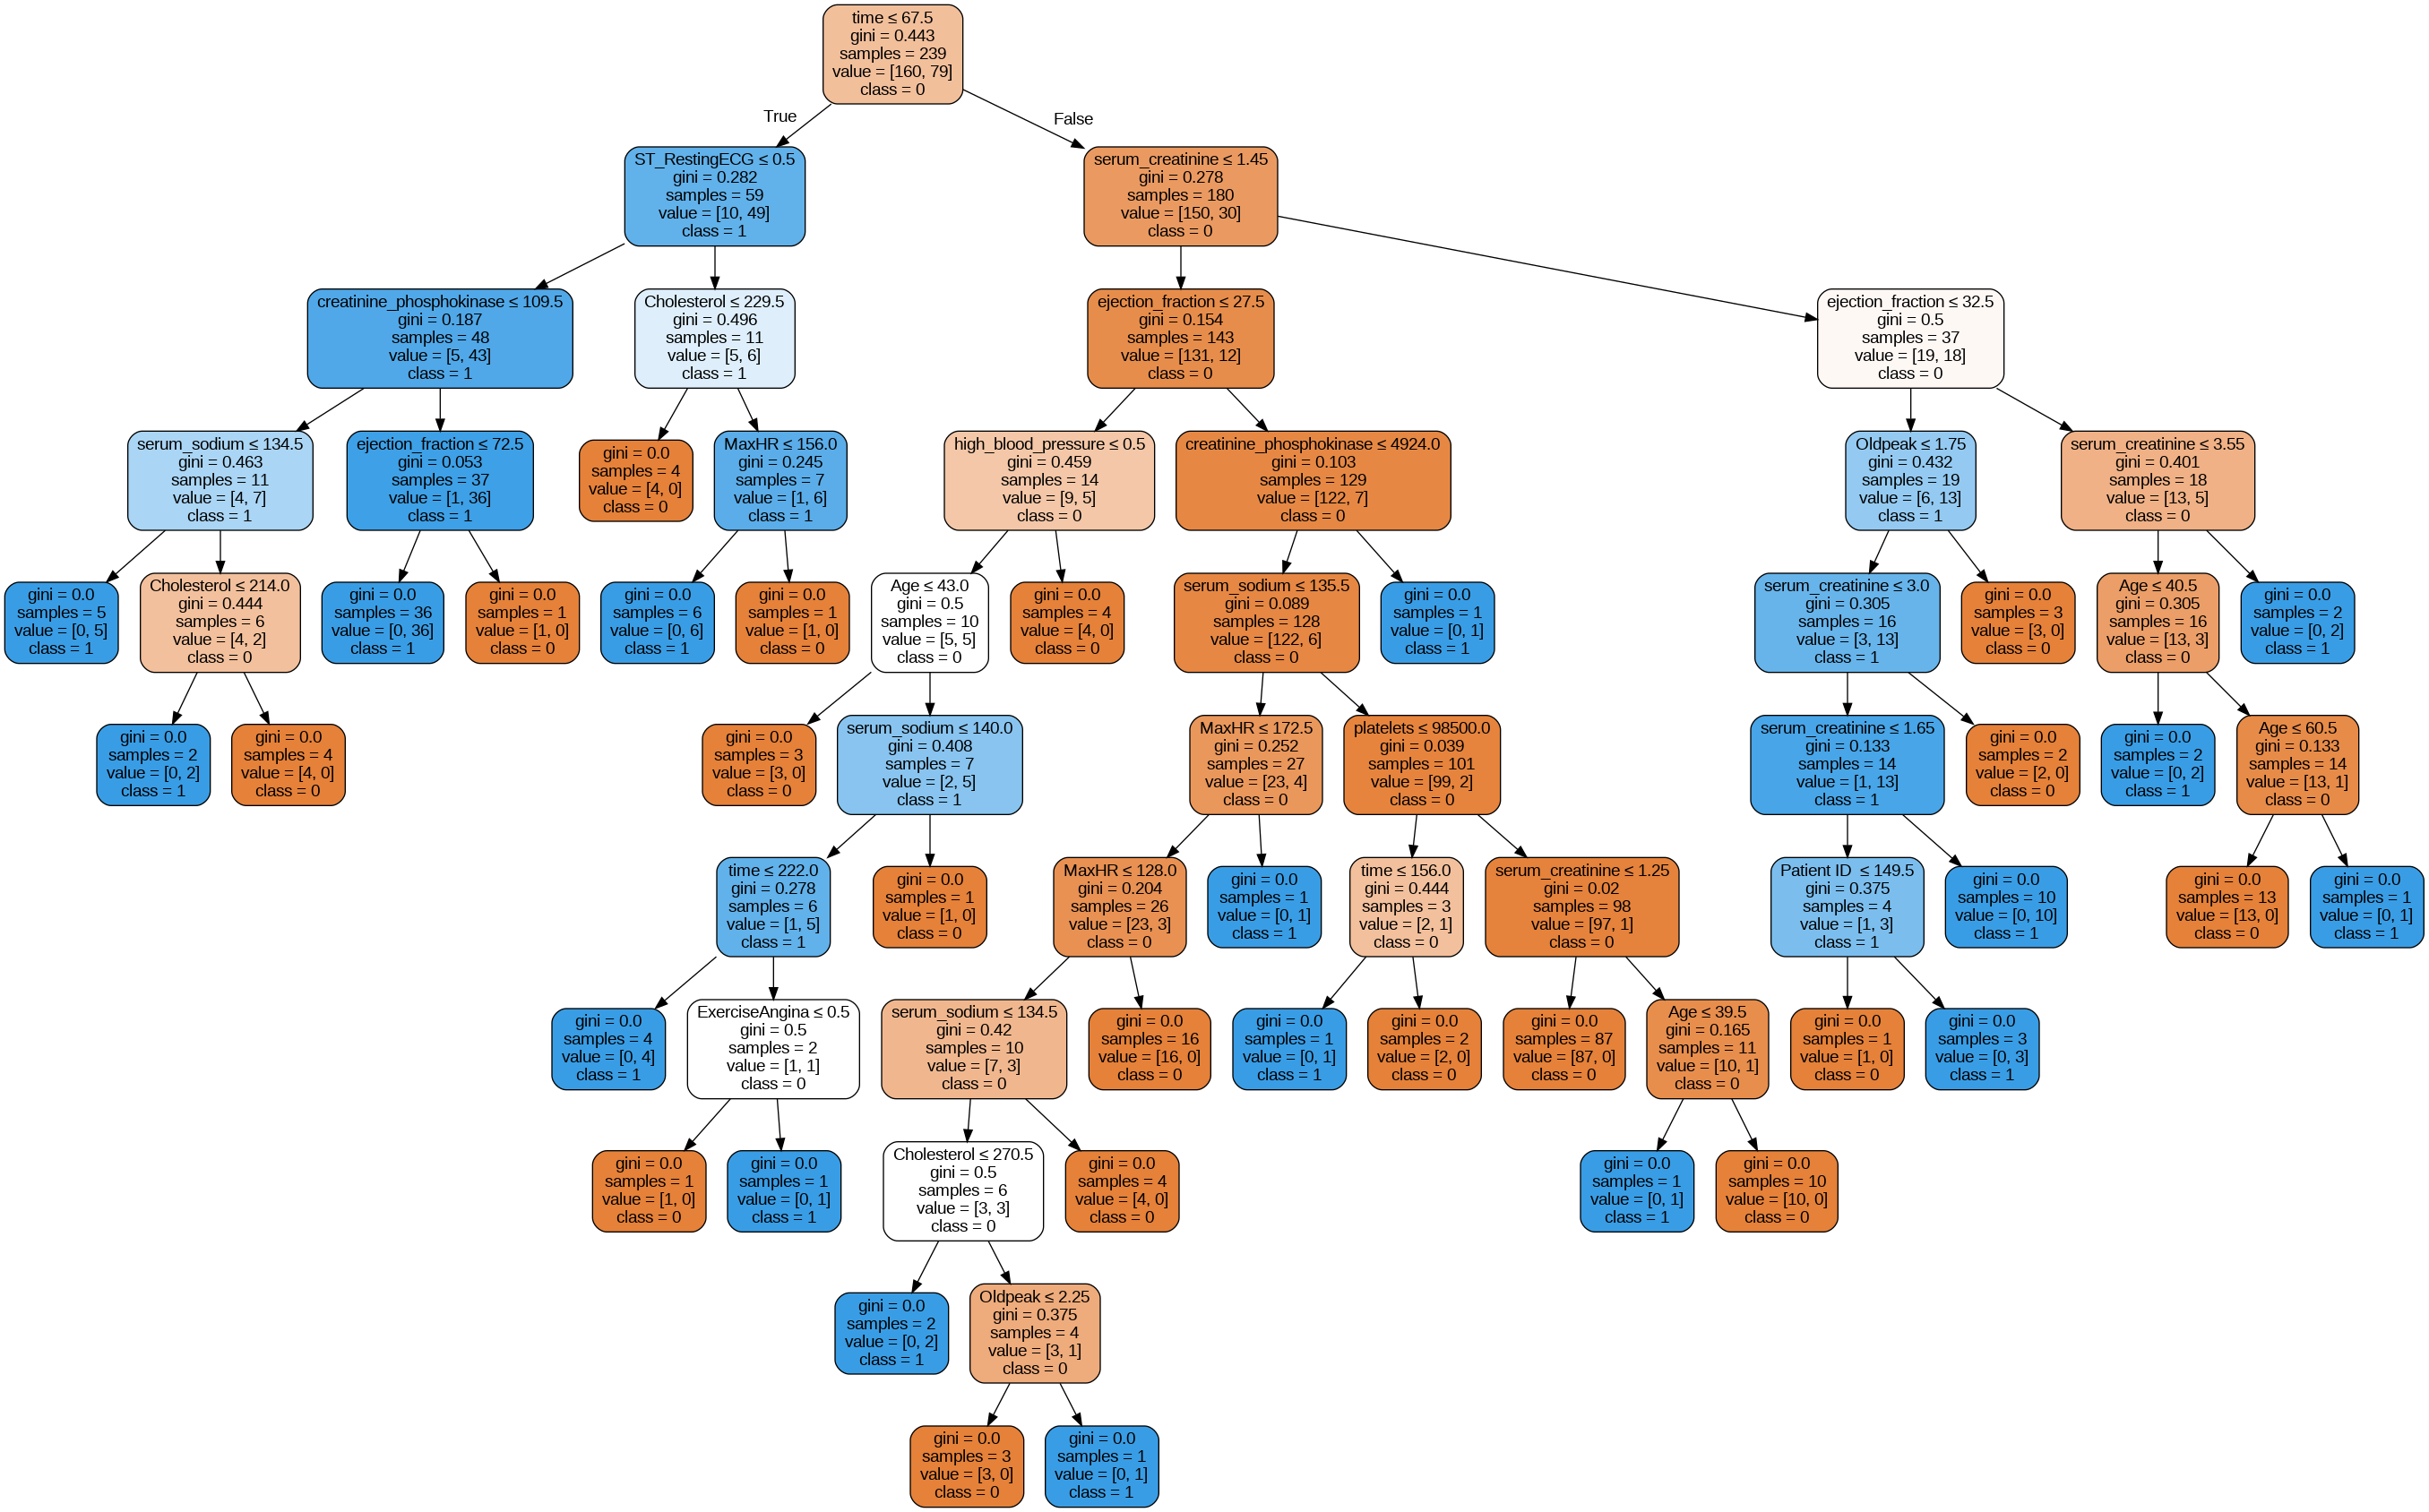

In [22]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from graphviz import Source

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X_test.columns,
                           class_names=Y_test.astype(str).unique(),
                           filled=True, rounded=True,
                           special_characters=True)

graph = Source(dot_data)
Image(graph.pipe(format='png'))
